# Análise Uso da Netflix
## Por: Michel Souza Santana
### 22/08/2023

### Conjunto de dados escolhido
* https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset

### Importando bibliotecas utilizadas no projeto

In [266]:
import pandas as pd
import matplotlib.pyplot as plt

### Carregando o conjunto de dados

In [267]:
data = pd.read_csv('/home/michel/Documentos/Projetos_Github/netflix_analise/data/Netflix Userbase.csv')
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


### Perguntas e objetivos da análise

#### Tendências de Receita:
* Como a receita mensal varia de acordo com o tipo de assinatura?
* Qual é a média de receita mensal por país?
* Existe alguma sazonalidade na receita mensal ao longo do ano?

#### Comportamento do Usuário:
* Qual é a idade média dos usuários por gênero?
* Quais são os dispositivos mais utilizados pelos usuários?
* xiste uma relação entre a idade dos usuários e a duração do plano de assinatura escolhido?

#### Retenção de Usuários:
* Qual é a taxa de retenção de usuários de um ano para o outro?
* Com que frequência os usuários fazem o último pagamento antes de parar de assinar?
* Os usuários mais jovens têm maior probabilidade de cancelar suas assinaturas?

#### Distribuição Geográfica:
* Quais são os países com maior número de assinantes?
* Existe uma diferença na receita mensal média entre os diferentes países?
* Há variações na idade média dos usuários entre os países?

#### Efeito da Duração do Plano:
* Os usuários com planos de longa duração tendem a permanecer assinantes por mais tempo?
* Qual é a distribuição das durações de plano escolhidas pelos usuários?
* Há alguma correlação entre a duração do plano e a idade do usuário?

#### Análise Temporal:
* Há alguma tendência de crescimento ou declínio na adesão ao longo dos anos?
* Existe alguma diferença nas taxas de pagamento entre os diferentes meses?

#### Segmentação do Gênero:
* Qual é a proporção de assinantes masculinos e femininos?
* Os usuários de diferentes gêneros têm preferências distintas em termos de planos de assinatura?

### Limpeza dos dados

In [268]:
data.dropna(inplace=True)

In [269]:
data.drop_duplicates('User ID', inplace=True)

In [270]:
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


### Preparação dos dados

In [271]:
data.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [272]:
data['Join Date'] = pd.to_datetime(data['Join Date'])
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])

/tmp/ipykernel_60523/4063173727.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Join Date'] = pd.to_datetime(data['Join Date'])
/tmp/ipykernel_60523/4063173727.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'])


In [273]:
data.dtypes

User ID                       int64
Subscription Type            object
Monthly Revenue               int64
Join Date            datetime64[ns]
Last Payment Date    datetime64[ns]
Country                      object
Age                           int64
Gender                       object
Device                       object
Plan Duration                object
dtype: object

In [274]:
data['Join Date'] = pd.to_datetime(data['Join Date'], format='%Y/%m/%d')

In [275]:
data['Last Payment Date'] = pd.to_datetime(data['Last Payment Date'], format='%Y/%m/%d')

In [276]:
data['Start Year'] = pd.to_datetime(data['Join Date']).dt.year
data['Start Month'] = pd.to_datetime(data['Join Date']).dt.month

data['Last Year'] = pd.to_datetime(data['Last Payment Date']).dt.year
data['Last Month'] = pd.to_datetime(data['Last Payment Date']).dt.month

In [277]:
data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Start Year,Start Month,Last Year,Last Month
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,2022,1,2023,10
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,2021,5,2023,6
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023,2,2023,6
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,2022,10,2023,6
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023,1,2023,6


### análises exploratórias

In [278]:
data.dtypes

User ID                       int64
Subscription Type            object
Monthly Revenue               int64
Join Date            datetime64[ns]
Last Payment Date    datetime64[ns]
Country                      object
Age                           int64
Gender                       object
Device                       object
Plan Duration                object
Start Year                    int32
Start Month                   int32
Last Year                     int32
Last Month                    int32
dtype: object

In [279]:
data.shape

(2500, 14)

In [280]:
data['Subscription Type'].unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

In [281]:
data['Monthly Revenue'].unique()

array([10, 15, 12, 13, 11, 14])

In [282]:
data['Age'].max()

51

In [283]:
data['Age'].min()

26

In [284]:
data['Age'].median()

39.0

In [285]:
data_female = data[data['Gender'] == 'Female']
data_female['Age'].count()

1257

In [286]:
data_male = data[data['Gender'] == 'Male']
data_male['Age'].count()

1243

In [287]:
data.groupby(['Country'])['Country'].count().sort_values(ascending=False)

Country
Spain             451
United States     451
Canada            317
Australia         183
Brazil            183
France            183
Germany           183
Italy             183
Mexico            183
United Kingdom    183
Name: Country, dtype: int64

In [288]:
data.groupby(['Start Year'])['Start Year'].count().sort_values(ascending=False)

Start Year
2022    2448
2023      38
2021      14
Name: Start Year, dtype: int64

### Visualização

#### Tendências de Receita


* Como a receita mensal varia de acordo com o tipo de assinatura?


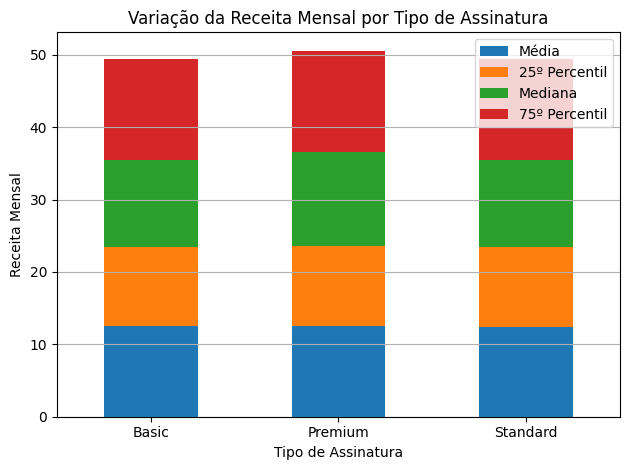

In [289]:
# Suponha que 'data' seja o seu DataFrame
variacao_receita_mensal = data.groupby('Subscription Type')['Monthly Revenue'].describe()

# Plote um gráfico de barras empilhadas
variacao_receita_mensal[['mean', '25%', '50%', '75%']].plot(kind='bar', stacked=True)
plt.title('Variação da Receita Mensal por Tipo de Assinatura')
plt.xlabel('Tipo de Assinatura')
plt.ylabel('Receita Mensal')
plt.xticks(rotation=0)
plt.legend(['Média', '25º Percentil', 'Mediana', '75º Percentil'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


* Qual é a média de receita mensal por país?

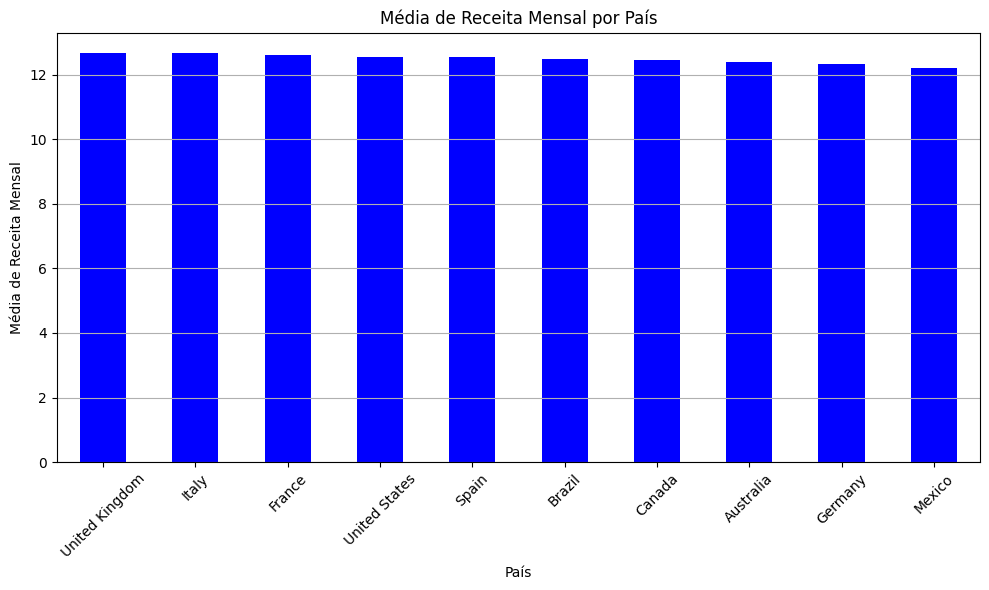

In [290]:
# Suponha que 'data' seja o seu DataFrame
media_receita_pais = data.groupby(['Country'])['Monthly Revenue'].mean().sort_values(ascending=False)

# Plote um gráfico de barras
plt.figure(figsize=(10, 6))
media_receita_pais.plot(kind='bar', color='blue')
plt.title('Média de Receita Mensal por País')
plt.xlabel('País')
plt.ylabel('Média de Receita Mensal')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


* Existe alguma sazonalidade na receita mensal ao longo do ano?

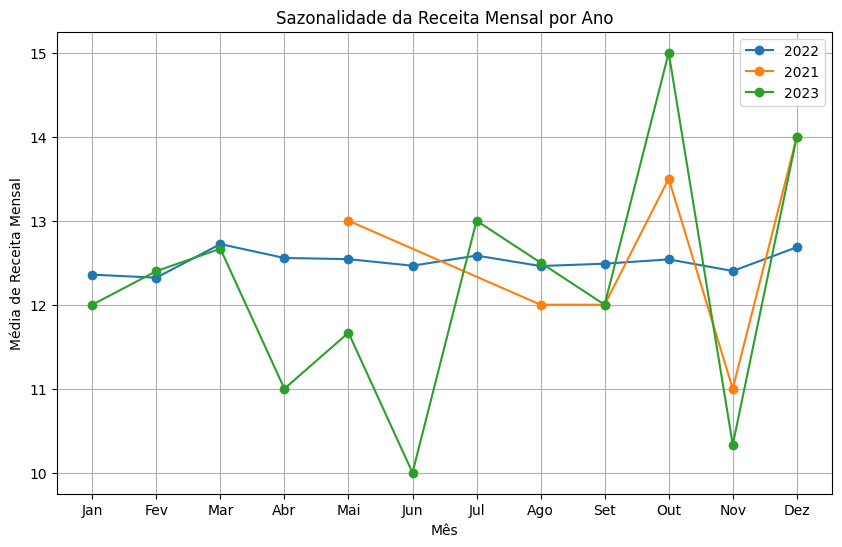

In [291]:
# Suponha que 'data' seja o seu DataFrame
# Crie uma coluna 'YearMonth' combinando os valores de 'Join Date'
data['YearMonth'] = data['Join Date']

# Converta a coluna 'YearMonth' para objetos de data para facilitar a ordenação
data['YearMonth'] = pd.to_datetime(data['YearMonth'], format='%Y-%m')

# Crie colunas separadas para o ano e o mês
data['Year'] = data['YearMonth'].dt.year
data['Month'] = data['YearMonth'].dt.month

# Agrupe os dados por ano e mês e calcule a média da coluna 'Monthly Revenue'
revenue_by_month_year = data.groupby(['Year', 'Month'])['Monthly Revenue'].mean()

# Plote um gráfico de linha para visualizar a sazonalidade por ano
plt.figure(figsize=(10, 6))

# Percorra os anos únicos e plote a sazonalidade por ano
for year in data['Year'].unique():
    year_data = revenue_by_month_year.loc[year]
    plt.plot(year_data.index, year_data.values, marker='o', label=str(year))

plt.title('Sazonalidade da Receita Mensal por Ano')
plt.xlabel('Mês')
plt.ylabel('Média de Receita Mensal')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid()
plt.show()


#### Comportamento do Usuário


#### Retenção de Usuários


#### Distribuição Geográfica


#### Efeito da Duração do Plano


#### Análise Temporal


#### Segmentação do Gênero

### Relatório